### Exploring & Machine Learning for Airbnb Listings in London

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Dir_path where files are placed
dir_path='D:\E\Ml\London'

### Calender Data Analysis

In [2]:
# Reading Calendar data for listings and getting unique listing

calendar = pd.read_csv(dir_path+'\\calendar.csv.gz')
print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

#Printing columns
print(calendar.columns)

We have 367 days and 69348 unique listings in the calendar data.
Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')


In [3]:
# Count missing values in each column
calendar.isnull().sum()

listing_id          0
date                0
available           0
price               8
adjusted_price      8
minimum_nights    384
maximum_nights    384
dtype: int64

In [4]:
#Determining Avaialbe Period of data
calendar.date.min(), calendar.date.max()

('2022-09-10', '2023-09-11')

The calendar covers one year time period i.e price and availability every day for the next one year. In our current data it is from 2022-09-10 to 2023-09-11.

In [5]:
calendar.available.value_counts()

f    17782349
t     7528563
Name: available, dtype: int64

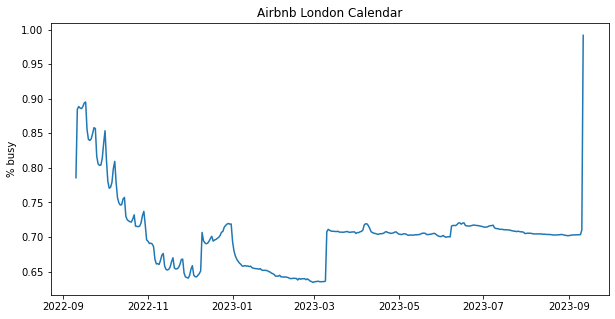

In [6]:
#Analysing Availabilty and Busy
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb London Calendar')
plt.ylabel('% busy')
plt.show();

The busiest month in London was October this year.The next busy months seems after April and extend to the summer.

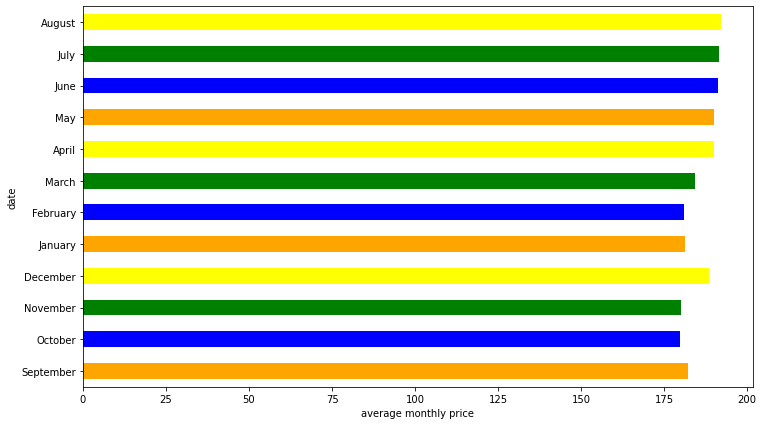

In [7]:
#Converting and analysing Calendar Prices throught months might take some time 
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' ,color=['orange','blue','green','yellow'], figsize = (12,7))
plt.xlabel('average monthly price');

In [8]:
# Reading Listings data and getting unique listing

listings = pd.read_csv(dir_path+'\\listings.csv.gz')

print('We have', listings.id.nunique(), 'listings in the listing data.')

We have 69351 listings in the listing data.


In [9]:
# Seprating avaialbe data columns depending on Data Types
int_list=[]
float_list=[]
obj_list=[]

for col in listings.columns:
    if listings[col].dtypes=='int64':
        int_list.append(col)
        
    elif listings[col].dtypes=='float64':
        float_list.append(col)
        
    else:
        obj_list.append(col)

print('Data is of {} Dimension\n'.format(listings.shape))        
print('There are {} integers DT columns in data \n'.format(len(int_list)))        
print(int_list,'\n')
print('There are {} Float DT columns in data \n'.format(len(float_list)))        
print(float_list,'\n')
print('There are {} Object DT columns in data \n'.format(len(obj_list)))        
print(obj_list,'\n')

Data is of (69351, 75) Dimension

There are 17 integers DT columns in data 

['id', 'scrape_id', 'host_id', 'accommodates', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'] 

There are 24 Float DT columns in data 

['host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_loca

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   69351 non-null  object 
 9   host_id                                       69351 non-null 

In [11]:
#Analysing neighbourhood_cleansed
listings['neighbourhood_cleansed'].fillna(value='Not Ava',inplace=True)
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)



,id
neighbourhood_cleansed,
Westminster,7763
Tower Hamlets,5595
Hackney,5168
Camden,4707
Kensington and Chelsea,4612
Southwark,3968
Islington,3790
Lambeth,3719
Wandsworth,3473


More listings are in Westminster, Tower Hamlets and followed by Hackney and so on. 

In [12]:
#Analysing review_scores_rating
listings['review_scores_rating'].fillna(value=0.0,inplace=True)


listings.groupby(by='review_scores_rating').count()[['id']].sort_values(by='id', ascending=False).head(10)


,id
review_scores_rating,
0.00,17778
5.00,16457
4.00,2385
4.50,2128
4.67,1683
4.75,1274
4.80,1116
4.83,1020
4.86,881


In [13]:
listings.review_scores_rating.describe()

count    69351.000000
mean         3.470204
std          2.084630
min          0.000000
25%          0.000000
50%          4.670000
75%          4.960000
max          5.000000
Name: review_scores_rating, dtype: float64

There are listings without any reviews followed by High Score Listings we will explore if review scores has an influence on price. Mean score rating is around 3.5.  

In [14]:
#Analysing Price Frequency by listing
listings.groupby(by='price').count()[['id']].sort_values(by='id', ascending=False).head(10)


,id
price,
$100.00,1937
$50.00,1737
$150.00,1586
$40.00,1572
$60.00,1525
$80.00,1443
$120.00,1379
$35.00,1304
$70.00,1268


In [15]:
#Converting Listing Price to float for Analysis
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)



In [16]:
# Replacing the “Price” column missing values with mode value
print('Mode for Price is {}'.format(listings['price'].mode()[0]))
print('Median for Price is {}'.format(listings['price'].median()))

listings['price'].fillna(listings['price'].mode()[0], inplace=True)
listings['price'].describe()

Mode for Price is 100.0
Median for Price is 100.0


count    69351.000000
mean       177.208822
std        412.823022
min          0.000000
25%         55.000000
50%        100.000000
75%        180.000000
max      25000.000000
Name: price, dtype: float64

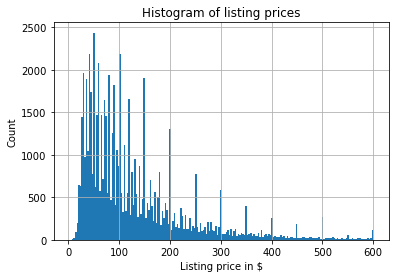

In [17]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

In order not to be affected by the extreme cases we can remove listings that exceed 600 per night as well as listings at price 0, for the following exploratory analysis.Note that there are listings above 600 per night which are levish listings in probably central london.   


### Review_Scores_Rating vs. Price

In [18]:
listings['Review_Score_Group']=np.where(listings['review_scores_rating']<=1,'A1',np.where(listings['review_scores_rating']<=2,'A2',np.where(listings['review_scores_rating']<=3,'A3','A4')))

group_list=listings['Review_Score_Group'].unique().tolist()
for g in group_list:
    df=listings[listings['Review_Score_Group']==g]
    print(g,df['review_scores_rating'].min(),df['review_scores_rating'].max(),df['price'].median())
    

A4 3.08 5.0 99.0
A1 0.0 1.0 100.0
A3 2.2 3.0 105.0
A2 1.5 2.0 100.0


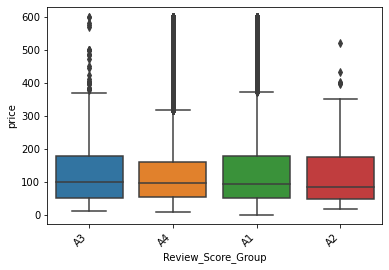

In [19]:

sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('Review_Score_Group')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='Review_Score_Group', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

### Neighbourhood vs. Price

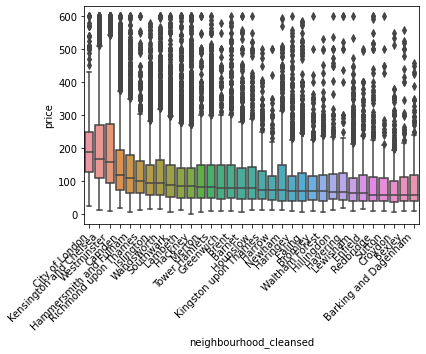

In [20]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

### Neighborhood Overview Availability  vs. price

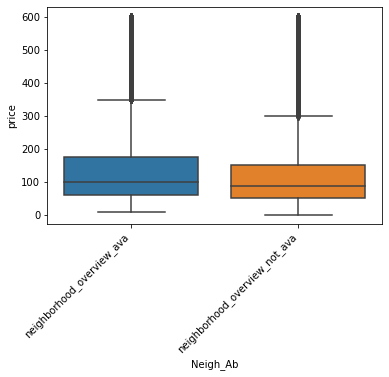

In [21]:
listings['neighborhood_overview'].fillna(value='Not Ava',inplace=True)


listings['Neigh_Ab']=np.where(listings['neighborhood_overview']=='Not Ava','neighborhood_overview_not_ava','neighborhood_overview_ava')

sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('Neigh_Ab')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='Neigh_Ab', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();


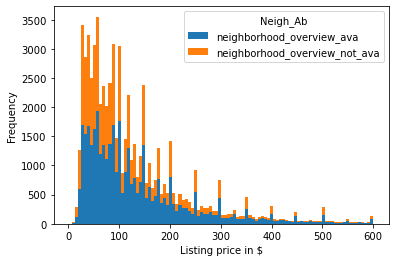

In [22]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'Neigh_Ab',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

### Host About Availability vs. price

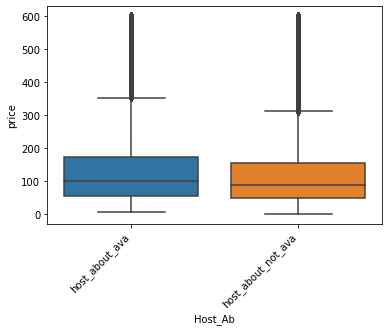

In [23]:
listings['host_about'].fillna(value='Not Ava',inplace=True)


listings['Host_Ab']=np.where(listings['host_about']=='Not Ava','host_about_not_ava','host_about_ava')
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('Host_Ab')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='Host_Ab', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

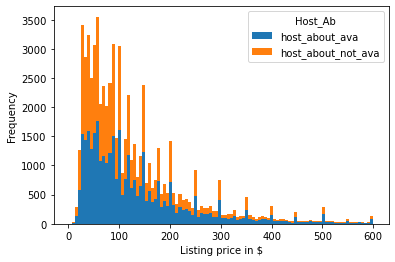

In [24]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'Host_Ab',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

### Room Type vs. Price

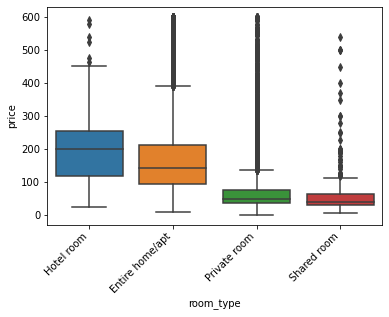

In [25]:
listings['room_type'].fillna(value='Not Ava',inplace=True)

sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();



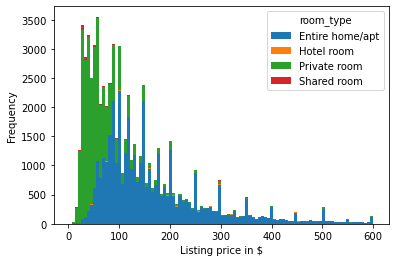

In [26]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $');


### Beds Vs. Price

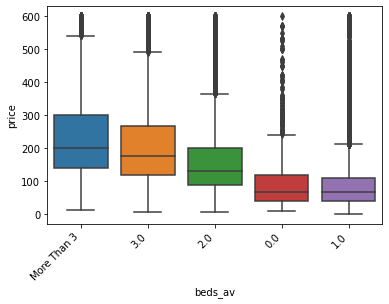

In [27]:
#clubbing beds where options is greater than 3

listings['beds'].fillna(value=0,inplace=True)

listings['beds_av']=np.where(listings['beds']>3,'More Than 3',listings['beds'])
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('beds_av')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='beds_av', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

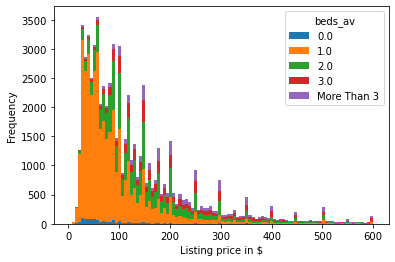

In [28]:
#Number of beds vs. price
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'beds_av',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

In [29]:
#Apply Clean Prop_type
df_Prop=pd.read_csv(dir_path+'\\Prop_Type.csv')
listings=pd.merge(listings,df_Prop,on=['property_type'],how='left')


### Correlations Analysis

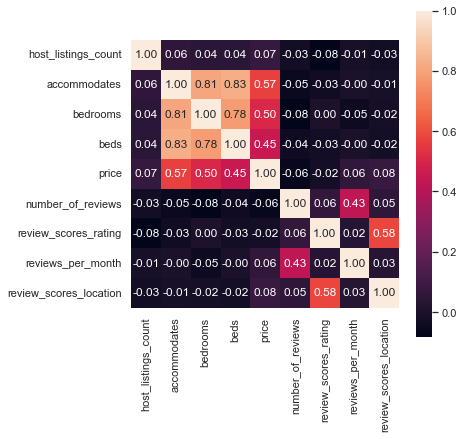

In [30]:
col = ['host_listings_count', 'accommodates', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month','review_scores_location']
#Correlations
corr = listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

### Amenities

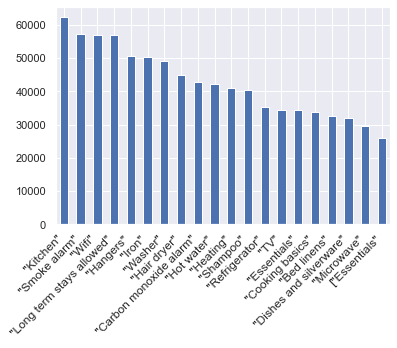

In [31]:
#Initial Plot 
listings['amenities'].fillna(value='Not Ava',inplace=True)

pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

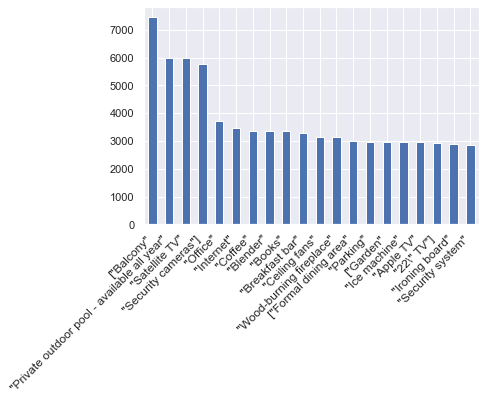

In [32]:
#Amenities vs. price
#It might take some time to execute
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

In [33]:
#Modeling Listing Prices
#Data pre-processing and feature engineering
#Clean up price feature. The feature we are going to model and predict.
listings['price'] = listings['price'].astype(float)

listings = listings.loc[(listings.price <= 600) & (listings.price > 0)]

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
#df_amenities = df_amenities.drop('',1)

### Cleaning Amenities

In [35]:
#Testing if 'amenities' columns contain non alphabetic chracters
listings['amenities']=listings['amenities'].str.title()
a1=listings['amenities'].unique().tolist()
au=[]
for a2 in a1:
    for a3 in a2:
        if a3 in au:
            pass
        else:
            au.append(a3)
            
abc=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'
    'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'
    ]            

for ab in abc:
    if ab in au:
        au.remove(ab)
    else:
        pass
print('Illegal Chracters are',au)

Illegal Chracters are ['[', '"', ' ', 'A', ',', '\\', '2', '0', '1', '9', '/', '-', ']', 'z', ':', '3', '4', '5', '7', '6', '8', '+', ')', '.', "'", '(', '&', '!', '%', '~', '@', '?', '#', '|', ';']


In [36]:
#Removing illegal chracters in 'ameniies
listings['amenities']=listings['amenities'].replace('','Nf')
listings['amenities'].fillna(value='Nf',inplace=True)
listings['amenities']=listings['amenities'].str.title()
listings['amenities']=listings['amenities'].str.replace("/",'')
listings['amenities']=listings['amenities'].str.replace('"','')
listings['amenities']=listings['amenities'].str.replace('"','')
listings['amenities']=listings['amenities'].str.replace('\\u2013','')
listings['amenities']=listings['amenities'].str.replace('\\u2019','')
listings['amenities']=listings['amenities'].str.replace('\\','')
listings['amenities']=listings['amenities'].str.replace('[','')
listings['amenities']=listings['amenities'].str.replace(']','')
listings['amenities']=listings['amenities'].str.replace('U2013','')
listings['amenities']=listings['amenities'].str.replace('u2013','')
listings['amenities']=listings['amenities'].str.replace('2013','')
listings['amenities']=listings['amenities'].str.replace('U2014','')
listings['amenities']=listings['amenities'].str.replace('u2014','')
listings['amenities']=listings['amenities'].str.replace('2014','')
listings['amenities']=listings['amenities'].str.replace('U2004','')
listings['amenities']=listings['amenities'].str.replace('u2004','')
listings['amenities']=listings['amenities'].str.replace('2004','')
listings['amenities']=listings['amenities'].str.replace('U2019','')
listings['amenities']=listings['amenities'].str.replace('u2019','')
listings['amenities']=listings['amenities'].str.replace('2019','')
listings['amenities']=listings['amenities'].str.replace('+','')
listings['amenities']=listings['amenities'].str.replace(')','')
listings['amenities']=listings['amenities'].str.replace('-','')
listings['amenities']=listings['amenities'].str.replace(':','')
listings['amenities']=listings['amenities'].str.replace('.','')
listings['amenities']=listings['amenities'].str.replace('(','')
listings['amenities']=listings['amenities'].str.replace('&','')
listings['amenities']=listings['amenities'].str.replace('!','')
listings['amenities']=listings['amenities'].str.replace('%','')
listings['amenities']=listings['amenities'].str.replace('~','')
listings['amenities']=listings['amenities'].str.replace('@','')
listings['amenities']=listings['amenities'].str.replace('?','')
listings['amenities']=listings['amenities'].str.replace('#','')
listings['amenities']=listings['amenities'].str.replace('|','')
listings['amenities']=listings['amenities'].str.replace(';','')

p2=listings.filter(items=['amenities'])
p2['amenities']=p2['amenities'].str.lower()
print(p2.shape)
print(p2.head(5))
    

(66818, 1)
                                           amenities
0  extra pillows and blankets, oven, fire extingu...
1  fire extinguisher, hair dryer, hangers, dishes...
2  extra pillows and blankets, oven, cleaning bef...
3  essentials, wifi, washer, long term stays allo...
4  oven, hair dryer, wine glasses, dining table, ...


In [37]:
#Adjusting Amenities based on common specs
p1=pd.read_csv(dir_path+'\\amenities.csv')
rev_amn_list=p1['Revised Amn'].unique().tolist()

for amn in rev_amn_list:
    p2=p1[p1['Revised Amn']==amn]
    merg_col=p2['Amn'].unique().tolist()
    
    av_merg_col=[]
    for col11 in merg_col:
        if col11 in df_amenities.columns:
            av_merg_col.append(col11)
        else:
            pass
            
    df_amenities[amn]=df_amenities[av_merg_col].sum(axis=1)
    df_amenities[amn]=np.where(df_amenities[amn]>0,1,0)
    df_amenities.drop(columns=av_merg_col,inplace=True)
    
col1=['Rm_kitchen','Rm_smoke alarm','Rm_wifi','Rm_long term stays allowed',
 'Rm_heating','Rm_hangers','Rm_iron','Rm_washer','Rm_hair dryer','Rm_carbon monoxide alarm','Rm_hot water','Rm_shampoo','Rm_dishes and silverware','Rm_refrigerator','Rm_tv','Rm_essentials','Rm_cooking basics','Rm_bed linens','Rm_microwave','Rm_dryer','Rm_stove','Rm_fire extinguisher','Rm_dedicated workspace','Rm_coffee maker','Rm_oven','Rm_hot water kettle','Rm_private entrance','Rm_bathtub','Rm_first aid kit','Rm_cleaning products','Rm_shower gel','Rm_freezer','Rm_extra pillows and blankets','Rm_toaster','Rm_free parking on premises','Rm_elevator','Rm_dining table','Rm_luggage dropoff allowed','Rm_wine glasses','Rm_lockbox','Rm_host greets you','Rm_drying rack for clothing','Rm_lock on bedroom door','Rm_body soap','Rm_roomdarkening shades','Rm_free street parking','Rm_paid parking off premises','Rm_backyard','Rm_hair conditioner','Rm_portable fans','Rm_patio or balcony','Rm_breakfast','Rm_security cameras on property','Rm_outdoor dining area','Rm_outdoor furniture','Rm_laundromat nearby','Rm_private patio or balcony','Rm_single level home','Rm_indoor fireplace','Rm_baking sheet','Rm_clothing storage','Rm_ethernet connection','Rm_bbq grill','Rm_paid parking on premises','Rm_air conditioning','Rm_crib','Rm_private fenced garden or backyard','Rm_high chair','Rm_pack n playtravel crib','Rm_mini fridge','Rm_cleaning before checkout','Rm_childrens books and toys','Rm_stainless steel oven','Rm_nespresso machine','Rm_netflix services','Rm_board games','Rm_childrens dinnerware','Rm_gym','Rm_safe','Rm_baby monitor','Rm_hot tub','Rm_building staff','Rm_barbecue utensils','Rm_keypad','Rm_shared patio or balcony','Rm_rice maker','Rm_standard cable','Rm_ev charger','Rm_baby bath','Rm_smart lock','Rm_electric stove','Rm_shared fenced garden or backyard','Rm_window guards','Rm_sound system','Rm_fire pit','Rm_waterfront','Rm_piano','Rm_premium cable','Rm_amazon services','Rm_wardrobe','Rm_gas stove','Rm_changing table','Rm_outlet covers','Rm_pack n playtravel crib available upon request','Rm_game console','Rm_bedroom comforts','Rm_portable heater','Rm_trash compactor','Rm_hdtv','Rm_shared garden or backyard','Rm_private garden or backyard','Rm_crib available upon request','Rm_bikes','Rm_bread maker','Rm_induction stove','Rm_lake access','Rm_private hot tub','Rm_record player','Rm_chromecast','Rm_fireplace guards','Rm_pool','Rm_dresser','Rm_stainless steel stove','Rm_ceiling fan','Rm_age group','Rm_closet','Rm_others','Rm_game console ps4','Rm_pool table','Rm_roku','Rm_table corner guards','Rm_pack n playtravel crib always at the listing','Rm_crib always at the listing','Rm_ping pong table','Rm_outdoor shower','Rm_shared hot tub','Rm_self checkin','Rm_bosch stainless steel oven','Rm_fast wifi','Rm_luxury items','Rm_soap']

df_amenities=df_amenities[col1]    

### Compiling Models Requirement data

In [38]:
#Replace the values in the following feature to 0 if “f”, to 1 if “t”.

columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','instant_bookable']
for c in columns:
    listings[c]=listings[c].fillna(value=0)
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)
    print(listings.groupby(by=c).count()[['id']].sort_values(by='id', ascending=False).head(10))
    

                      id
host_is_superhost       
0                  58772
1                   8046
                           id
host_identity_verified       
1                       56011
0                       10807
                         id
host_has_profile_pic       
1                     65561
0                      1257
                     id
instant_bookable       
0                 41652
1                 25166


In [39]:
all_col=col+columns
all_col

['host_listings_count',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'number_of_reviews',
 'review_scores_rating',
 'reviews_per_month',
 'review_scores_location',
 'host_is_superhost',
 'host_identity_verified',
 'host_has_profile_pic',
 'instant_bookable']

In [40]:
listings_new = listings[all_col]

In [41]:
listings_new.dtypes

host_listings_count       float64
accommodates                int64
bedrooms                  float64
beds                      float64
price                     float64
number_of_reviews           int64
review_scores_rating      float64
reviews_per_month         float64
review_scores_location    float64
host_is_superhost           int64
host_identity_verified      int64
host_has_profile_pic        int64
instant_bookable            int64
dtype: object

In [42]:
#Fill the missing values in the numeric features with median.

for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

In [43]:
#Processing and adding categorical features.

for cat_feature in [ 'neighbourhood_cleansed','room_type','bathrooms_text','beds_av','Host_Ab','Neigh_Ab','property_type_rev']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)


In [44]:
#Add Term document matrices that we created earlier from amenities feature.

listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

listings_new.columns

Index(['host_listings_count', 'accommodates', 'bedrooms', 'beds', 'price',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month',
       'review_scores_location', 'host_is_superhost',
       ...
       'Rm_pack n playtravel crib always at the listing',
       'Rm_crib always at the listing', 'Rm_ping pong table',
       'Rm_outdoor shower', 'Rm_shared hot tub', 'Rm_self checkin',
       'Rm_bosch stainless steel oven', 'Rm_fast wifi', 'Rm_luxury items',
       'Rm_soap'],
      dtype='object', length=247)

In [45]:
#Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 65.319
R^2 test: 0.604


In [46]:
#Feature importance of Random Forest
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
103,Private Room,0.262540
0,host_listings_count,0.114492
6,reviews_per_month,0.070441
1,accommodates,0.069261
2,bedrooms,0.068359
4,number_of_reviews,0.040838
7,review_scores_location,0.038361
5,review_scores_rating,0.033064
51,1 bath,0.032618
44,Westminster,0.023988


In [47]:
#LightGBM

from lightgbm import LGBMRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }
        
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')
        
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

[100]	valid's rmse: 76.5936
[200]	valid's rmse: 69.6986
[300]	valid's rmse: 67.3257
[400]	valid's rmse: 66.1703
[500]	valid's rmse: 65.473
[600]	valid's rmse: 65.0006
[700]	valid's rmse: 64.6854
[800]	valid's rmse: 64.4583
[900]	valid's rmse: 64.2808
[1000]	valid's rmse: 64.108
R^2 test: 0.619


<AxesSubplot:>

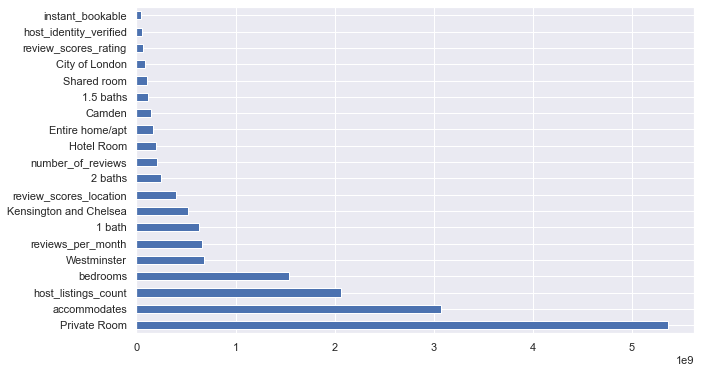

In [48]:
#Feature importance of LightGBM
X = listings_new.drop('price', axis=1)
y = listings_new.price

feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [50]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [51]:
from datetime import datetime
import time
import xgboost as xgb
from xgboost import plot_importance


xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg=ft_weights_xgb_reg.sort_values('weight', ascending=False).head(20)
ft_weights_xgb_reg

Time taken to run: 0.2 minutes

Training MSE: 3230.7154
Validation MSE: 4017.9113

Training r2: 0.7058
Validation r2: 0.6313


,weight
Private Room,0.590203
1 bath,0.034643
Kensington and Chelsea,0.026422
Shared room,0.021492
Westminster,0.020695
bedrooms,0.020266
Shared Room,0.017616
accommodates,0.017398
City of London,0.015059
1.5 baths,0.014204
